<a href="https://colab.research.google.com/github/KaueAbbe/Projeto-Estude_Python/blob/main/Estude%20Estat%C3%ADstica/Regress%C3%A3o/Exerc%C3%ADcio_Correla%C3%A7%C3%A3o_e_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=green size=10>Exercícios Correlação e Regressão</font>
***

## Trabalho sobre correlação e regressão


# <font color=green>DATASET DO PROJETO</font>
***

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).

### Dados:
- **temp_media** - Temperatura Média (°C)
- **consumo** - Consumo de Cerveja (litros)


---

### Solução do problema com dependência do statsmodels

In [ ]:
!pip install scipy==1.2 --upgrade

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, scipy, statsmodels</font>

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import probplot

### Importe o dataset

In [4]:
dados = pd.read_csv('dados_reg.csv', sep = ';')

### Visualize o conteúdo do DataFrame

In [5]:
dados.head(10)

,Y,X
0,25461,27.30
1,28972,27.02
2,30814,24.82
3,29799,23.98
4,28900,23.82
5,28218,23.78
6,29732,24.00
7,28397,24.90
8,24886,28.20
9,37937,26.76


### Obtenha e avalie as estatísticas descritivas dos dados

In [6]:
dados.describe()

,Y,X
count,365.000000,365.000000
mean,25401.367123,21.226356
std,4399.142703,3.180108
min,14343.000000,12.900000
25%,22008.000000,19.020000
50%,24867.000000,21.380000
75%,28631.000000,23.280000
max,37937.000000,28.860000


### Análise gráfica
### Construa um box plot para cada variável do dataset

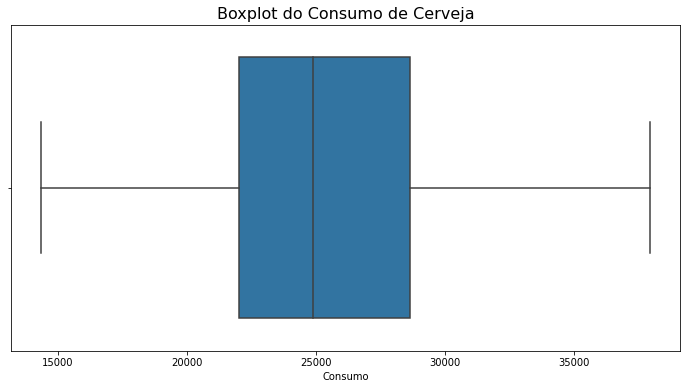

In [53]:
ax = sns.boxplot(x = 'Y', data = dados)
ax.figure.set_size_inches(12,6)
ax.set_title('Boxplot do Consumo de Cerveja',fontsize = 16)
ax.set_xlabel('Consumo')
ax=ax

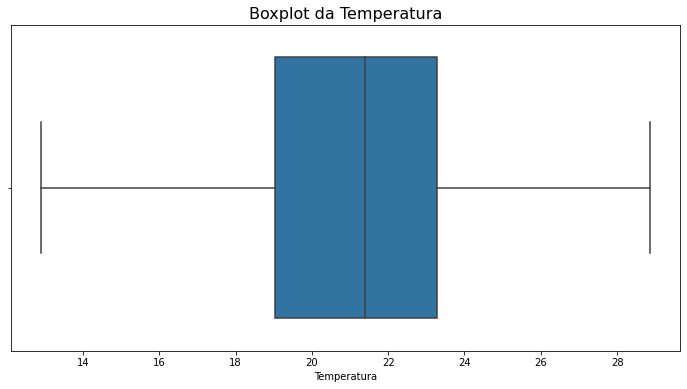

In [54]:
ax = sns.boxplot(x = 'X', data = dados)
ax.figure.set_size_inches(12,6)
ax.set_title('Boxplot da Temperatura',fontsize = 16)
ax.set_xlabel('Temperatura')
ax=ax

### Identifique se existe uma relação linear entre as variáveis $Y$ e $X$
### <font color='red'>Utilizando o método gráfico</font>

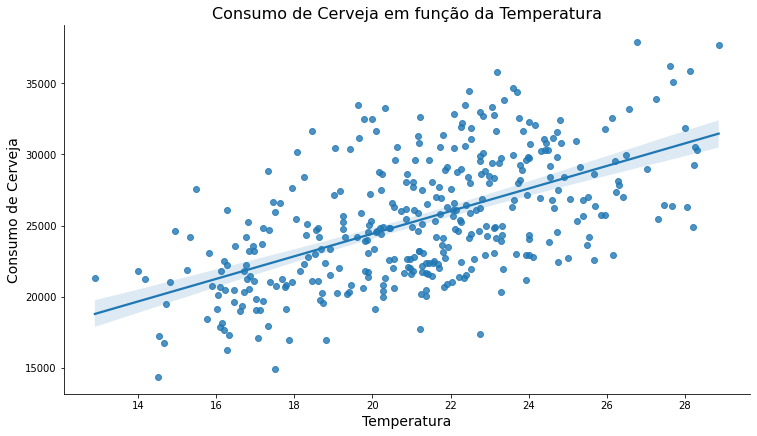

In [58]:
ax = sns.lmplot(x= 'X', y = 'Y', data = dados)
ax.fig.set_size_inches(12,6)
plt.title('Consumo de Cerveja em função da Temperatura',fontsize = 16)
plt.xlabel('Temperatura',fontsize = 14)
plt.ylabel('Consumo de Cerveja',fontsize = 14)
ax=ax

### <font color='red'>Utilizando a matriz de correlação</font>

In [22]:
dados.corr()

,Y,X
Y,1.000000,0.574615
X,0.574615,1.000000


### Avalie os resultados acima:

É possível afirmar que existe uma relação linear entre as variáveis?

Resp.: **Sim, existe uma tendência linear.**

É possível quantificar a intensidade dessa relação?

Resp.:**A correlação é de 0.57.**

É possível afirmar que existe uma relação de causalidade entre $Y$ e $X$ a partir dos resultados da matriz de correlação?

Resp.: **Não. Correlação é uma relação de inter-dependência entre as duas variáveis, não significa que uma causa a outra.**

### Prepare os dados para estimar um modelo de regressão linear simples

In [25]:
import statsmodels.api as sm
Y = dados.Y
X = sm.add_constant(dados.X)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Estime o modelo de regressão linear simples

In [26]:
resultado_regressao = sm.OLS(Y, X).fit()

### Visualize o resultado da regressão

In [66]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     178.9
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           1.87e-33
Time:                        02:10:25   Log-Likelihood:                -3506.3
No. Observations:                 365   AIC:                             7017.
Df Residuals:                     363   BIC:                             7024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8528.9073   1275.363      6.687      0.0

In [28]:
dados['Y_previsto'] = resultado_regressao.predict()
dados.head(5)

,Y,X,Y_previsto
0,25461,27.30,30229.200544
1,28972,27.02,30006.633434
2,30814,24.82,28257.891852
3,29799,23.98,27590.190521
4,28900,23.82,27463.009315


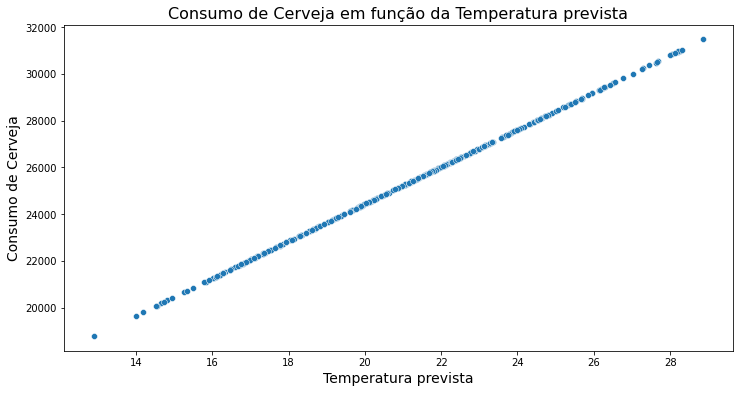

In [61]:
ax = sns.scatterplot(x= 'X', y = 'Y_previsto', data = dados)
ax.figure.set_size_inches(12,6)
plt.title('Consumo de Cerveja em função da Temperatura prevista',fontsize = 16)
plt.xlabel('Temperatura prevista',fontsize = 14)
plt.ylabel('Consumo de Cerveja',fontsize = 14)
ax=ax

### Utilizando nosso modelo estimado para fazer previsões.
### Qual seria o consumo de cerveja para um dia com temperatura média de 42° C?

In [32]:
resultado_regressao.predict([1,42])[0]

41913.97383816628

### Obtenha os resíduos da regressão

In [36]:
dados['residuos']=resultado_regressao.resid
dados.head()

,Y,X,Y_previsto,residuos
0,25461,27.30,30229.200544,-4768.200544
1,28972,27.02,30006.633434,-1034.633434
2,30814,24.82,28257.891852,2556.108148
3,29799,23.98,27590.190521,2208.809479
4,28900,23.82,27463.009315,1436.990685


### Plote um gráfico de dispersão dos resíduos da regressão contra o $Y$ previsto

<Figure size 864x864 with 0 Axes>

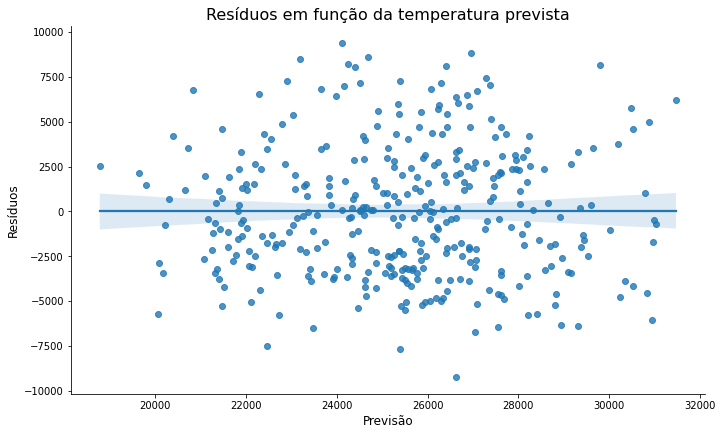

In [64]:
plt.figure(figsize= (12,12))
ax = sns.lmplot(x= 'Y_previsto', y = 'residuos', data = dados)
ax.figure.set_size_inches(12,6)
plt.title('Resíduos em função da temperatura prevista',fontsize = 16)
plt.xlabel('Previsão',fontsize = 12)
plt.ylabel('Resíduos',fontsize = 12)
ax=ax

### Obtenha o QQPlot dos resíduos

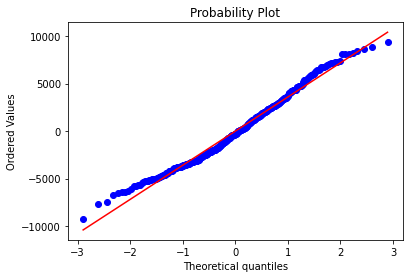

In [67]:
(_,(_,_,_)) = probplot(dados.residuos,plot = plt)

### <font color='red'>A partir dos outputs acima, qual conclusão podemos tirar sobre o comportamento dos resíduos?</font>

### Obtenha o R² da regressão pelo método da soma dos quadrados

# $$R^2 = \frac{SQR}{SQT}$$

In [43]:
SQR = dados.Y_previsto.apply(lambda x: (x - dados.Y_previsto.mean())**2).sum()
SQR

2325899486.737787

In [44]:
SQT = dados.Y.apply(lambda x: (x - dados.Y.mean())**2).sum()
SQT

7044294174.805479

In [45]:
R2 = SQR / SQT
R2

0.3301820493324321

In [68]:
resultado_regressao.rsquared

0.330182049332432